# Predictive modeling using logistics regression

Loads loan data set in data


In [825]:
data=read.csv("c:/Users/bibek/Desktop/LoanData.csv")

In [826]:
levels(data$Status)

[1] "Current" "Default" "Late"

Loan status set as a binary outcome. 0 for current loans, 1 for late or default loans

In [827]:
levels(data$Status)=c(0,1,1)

Debt-to-income ratio segmented into three levels ‘low’ for ratio below 10%, ‘medium’ for ratio between 10% and 30%, ‘high’ for ratio above 30%

In [828]:
data$Ratio=cut(data$Debt.To.Income.Ratio, breaks=c(-1,.1,.3,99999), labels=c("low","medium", "high"))

Calls logistic regression to dataset using Credit.Grade, Amount, Age, Borrower.Rate and Debt to Income Ratio as explanatory variables.

In [829]:
logdata=glm(Status~Credit.Grade+Amount+Age+Borrower.Rate+Ratio,family=binomial,data=data)

Summary output of logistics regression

In [830]:
summary(logdata)


Call:
glm(formula = Status ~ Credit.Grade + Amount + Age + Borrower.Rate + 
    Ratio, family = binomial, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1415  -0.3947  -0.2385  -0.1387   3.2415  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -7.655e+00  4.313e-01 -17.749  < 2e-16 ***
Credit.GradeAA -6.137e-01  5.527e-01  -1.110 0.266868    
Credit.GradeB   2.937e-01  3.855e-01   0.762 0.446145    
Credit.GradeC  -3.589e-02  3.811e-01  -0.094 0.924978    
Credit.GradeD   3.293e-02  3.839e-01   0.086 0.931645    
Credit.GradeE   6.333e-01  3.913e-01   1.618 0.105565    
Credit.GradeHR  1.163e+00  4.015e-01   2.896 0.003781 ** 
Credit.GradeNC  1.687e+00  5.083e-01   3.318 0.000906 ***
Amount          4.538e-05  1.593e-05   2.849 0.004390 ** 
Age             3.675e-01  2.221e-02  16.545  < 2e-16 ***
Borrower.Rate   1.105e+01  1.274e+00   8.671  < 2e-16 ***
Ratiomedium    -1.062e-02  1.272e-01  -0.083 0.933469  

# Evaluation of in sample fitting of logistic regression model

In [831]:
forecast=predict(logdata,newdata=data,type="response") 

Saves prediction on fcst in a confusion matrix based on status of loan using 0.5 as cutoff probability

In [832]:
fcst=table(data$Status,floor(forecast+.5))

Displays confusion matrix for loan status prediction

In [833]:
fcst

   
       0    1
  0 5154   32
  1  385   40

Displays the confusion matrix with new updated cutoff probability of 92.425%

In [834]:
fcst=table(data$Status,floor(forecast+.9242559))

In [835]:
fcst


   
       0    1
  0 3804 1382
  1   88  337

# Misclassification rate is higher when cutoff probabily is  chosen 92.425%

Selection of 4611 random loans as a training set 

In [836]:
train=sample(1:5611,4611)

Calls linear regression for train set and stores it in logdata2 

In [837]:
logdata2=glm(Status~Credit.Grade+Amount+Age+Borrower.Rate+Ratio,family=binomial,data=data[train,])

Predicts the model for train set and saves it in forecast

In [838]:
forecast=predict(logdata2,newdata=data[-train,],type="response")

Displays the prediction of trainset

In [839]:
table(data$Status[train])


   0    1 
4263  348 

Stores the cutoff value in cut

In [840]:
cut=table(data$Status[train])[1]/(table(data$Status[train])[1]+table(data$Status[train])[2])

In [841]:
cut

0 
0.9245283

Generates confusion matrix for the test set based on loan status and cutoff probability

In [842]:
fcst=table(data$Status[-train],floor(forecast+cut))

In [843]:
fcst

   
      0   1
  0 662 261
  1  13  64

Displays the misclassification rate.

In [844]:
(fcst[1,2]+fcst[2,1])/sum(fcst) 

[1] 0.274

Stores the dataframe in new for trainset

In [845]:
new = data.frame(forecast,data$Status[-train]) 

Orders the data stored in new in decreasing order and stores in new1

In [846]:
new1=new[order(forecast,decreasing=T),] 


Saves mean value of test set into main

In [847]:
main=mean(as.numeric(data$Status[-train]))-1 

In [848]:
main

[1] 0.077

Calculation of lift curve using For loop

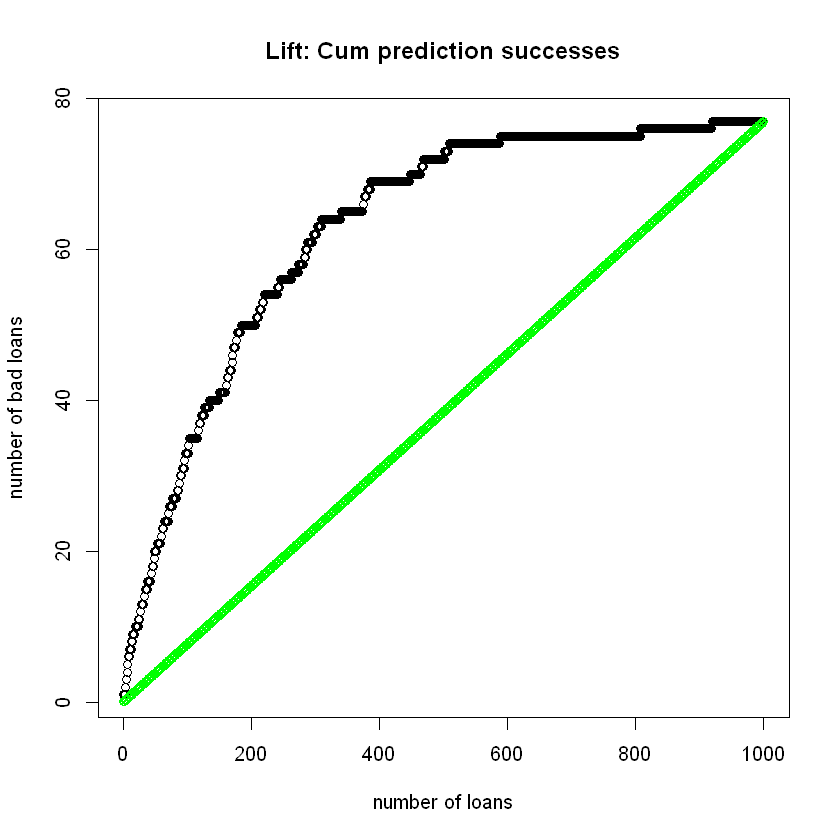

In [854]:
x=dim(1000)
y=dim(1000)
r=dim(1000)
x[1]=1
y[1]=as.numeric(new1[1,2])-1
r[1]=main
for (i in 2:1000){
x[i]=i
r[i]=i*main
y[i]=y[i-1]+as.numeric(new1[i,2])-1}
plot(x,y,xlab="number of loans",ylab="number of bad loans",main="Lift: Cum prediction successes")
points(x,r,col="green")

Calculaion of out-of-sample prediction accuracy rate for 20 random test samples.Sample size is 1000 loans. 

In [850]:
dot=dim(20)

In [851]:
for (j in 1:20){ 
    train=sample(1:5611,4611)
    logdata20=glm(Status~Credit.Grade+Amount+Age+Borrower.Rate+Ratio,family=binomial,data=data[train,])
    forecast=predict(logdata20,newdata=data[-train,],type="response")
    cut=table(data$Status[train])[1]/(table(data$Status[train])[1]+table(data$Status[train])[2])
    fcst=table(data$Status[-train],floor(forecast+cut))
    dot[j]=(fcst[1,1]+fcst[2,2])/sum(fcst)
    }


Displays the mean accuracy rate of twenty different samples

In [852]:
mean(dot)

[1] 0.73545

Displays the individual accuracy rate of 20 different samples

In [853]:
dot

[1] 0.741 0.737 0.754 0.743 0.720 0.735 0.719 0.741 0.739 0.738 0.728 0.731
[13] 0.776 0.715 0.736 0.741 0.717 0.717 0.727 0.754